In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [4]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")


Saving test.csv to test.csv
Saving Train.csv to Train.csv
test.csv has been uploaded, with length 5095968
Train.csv has been uploaded, with length 15641512


**Data Exploration**

In [113]:
train_df = pd.read_csv('Train.csv',delimiter=',')
display(train_df)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [114]:
test_df = pd.read_csv('test.csv',delimiter=',')
display(test_df)

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,21215,0.0,2011-02-25,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,Rufiji,Mahanzi,Iringa,11,1,Iringa Rural,Wasa,769,True,GeoData Consultants Ltd,VWC,Wasa,True,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,25893,0.0,2011-04-17,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Uzunguni,Dodoma,1,1,Kondoa,Chandama,0,True,GeoData Consultants Ltd,VWC,Soya,False,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,2,15713,0.0,2011-03-27,Water,0,Gover,36.363337,-7.297600,Uganda,0,Rufiji,Uganda,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,3,17247,0.0,2011-07-14,Ka,0,KA,31.496315,-2.167140,Kakindo,0,Lake Victoria,Nyamilanda A,Kagera,18,3,Muleba,Kyebitembe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,4,1248,0.0,2011-07-31,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Ibosa,Kagera,18,2,Bukoba Rural,Nyakato,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,14845,45291,1000.0,2011-03-10,Danida,1811,DANID,34.533405,-9.781788,none,0,Lake Nyasa,Ng'Alike,Iringa,11,5,Ludewa,Mlangali,45,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14846,14846,54736,0.0,2011-03-18,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,Rufiji,Magoha,Morogoro,5,3,Kilombero,Lumemo,150,True,GeoData Consultants Ltd,NaN,NaN,True,2010,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,14847,44238,0.0,2012-11-03,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,Lake Tanganyika,Simbo 2,Tabora,14,3,Uyui,Magiri,0,True,GeoData Consultants Ltd,VWC,Maguri water supply,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14848,14848,13229,0.0,2013-01-18,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,Lake Tanganyika,Maendeleo,Kigoma,16,1,Kibondo,Rugongowe,700,True,GeoData Consultants Ltd,VWC,Kichananga gravity water supply,False,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe


Observation :-

Train data has :- 44550 rows × 41 columns

Test data has :- 14850 rows × 41 columns

But train and test data have 1 column which is different.

Look at the data types of each column

In [115]:
print(train_df.dtypes)

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [116]:
print(test_df.dtypes)

Unnamed: 0                 int64
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment   

Data types are Object, Float, int

In [117]:
# To check null values
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [118]:
test_df.isnull().sum()

Unnamed: 0                  0
id                          0
amount_tsh                  0
date_recorded               0
funder                    842
gps_height                  0
installer                 848
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 84
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            843
recorded_by                 0
scheme_management        1045
scheme_name              7056
permit                    720
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_gr

Here we can see that Funder, Installer, Sub village, Public meeting, Scheme mgmt, Scheme name and permit have high values of Nan values. So we will remove these columns from both train and test data.


In [119]:
# Dropping features
train_df=train_df.drop(['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit','num_private','recorded_by'],axis = 1)

In [120]:
test_df=test_df.drop(['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit','num_private','recorded_by'],axis = 1)

We also remove num_private(contains data as 0) and other columns which gives us same types of data.

In [121]:
train_df=train_df.drop(['extraction_type_group','source_type','extraction_type_class','payment_type','quantity_group','source_class','waterpoint_type_group','region_code','district_code','lga','id'],axis = 1)

In [122]:
test_df=test_df.drop(['extraction_type_group','source_type','extraction_type_class','payment_type','quantity_group','source_class','waterpoint_type_group','region_code','district_code','lga','id','Unnamed: 0'],axis = 1)

Now we have around 20 features which will be used to determine our objective.

(array([24194.,     0.,     0.,     0.,     0., 17118.,     0.,     0.,
            0.,  3238.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

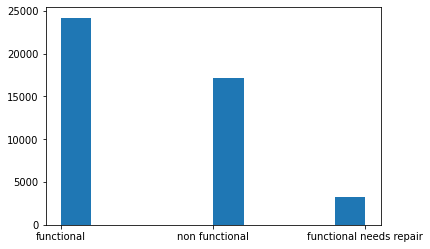

In [123]:
#Visualizing our objective
plt.hist(train_df["status_group"])

****Preprocessing part :-****

Treatment of missing values such as 0 or none in columns.

Categorical variables are converted into numbers.

In [124]:
train_df.construction_year=pd.to_numeric(train_df.construction_year)
test_df.construction_year=pd.to_numeric(test_df.construction_year)

In [125]:
#Checking which columns contains too many 0's
for col in train_df: # Check frequency of most common values
    cs = train_df[col].value_counts(normalize=True, sort=True, ascending=False)
    for k in cs.keys()[0:5]:
        print( col, k, int(cs[k]*1000)/10. )

amount_tsh 0.0 70.1
amount_tsh 500.0 5.2
amount_tsh 50.0 4.2
amount_tsh 20.0 2.5
amount_tsh 1000.0 2.5
date_recorded 2011-03-15 0.9
date_recorded 2011-03-17 0.9
date_recorded 2013-02-03 0.8
date_recorded 2011-03-14 0.8
date_recorded 2011-03-16 0.8
gps_height 0 34.6
gps_height -15 0.1
gps_height -13 0.0
gps_height 1290 0.0
gps_height 303 0.0
longitude 0.0 3.0
longitude 39.09087979 0.0
longitude 32.98751118 0.0
longitude 32.972718699999994 0.0
longitude 39.10124424 0.0
latitude -2e-08 3.0
latitude -6.98311512 0.0
latitude -6.96247516 0.0
latitude -7.17715478 0.0
latitude -6.95732845 0.0
wpt_name none 6.0
wpt_name Shuleni 2.9
wpt_name Zahanati 1.4
wpt_name Msikitini 0.8
wpt_name Kanisani 0.5
basin Lake Victoria 17.1
basin Pangani 15.0
basin Rufiji 13.5
basin Internal 13.1
basin Lake Tanganyika 10.7
region Iringa 9.0
region Shinyanga 8.3
region Mbeya 8.1
region Kilimanjaro 7.4
region Morogoro 6.6
ward Igosi 0.5
ward Imalinyi 0.4
ward Siha Kati 0.4
ward Mdandu 0.3
ward Mishamo 0.3
populatio

From here we can obseve that amount_tsh, gps_height, population, construction_year,longitude,latitude has too many 0's which needs to be treated.

In [126]:
train_df['construction_year'].median()

1985.0

In [127]:
train_df.loc[train_df.construction_year == 0, train_df.columns=='construction_year'] = 1985 #all values which are 0's has been converted to median of data

In [128]:
test_df['construction_year'].median()

1986.0

In [129]:
test_df.loc[test_df.construction_year == 0, test_df.columns=='construction_year'] = 1986

In [130]:
train_df['gps_height'].mean()

665.4907744107744

In [131]:
train_df.loc[train_df.gps_height == 0, train_df.columns=='gps_height'] = 665.49

In [132]:
test_df['gps_height'].mean()

676.716632996633

In [133]:
test_df.loc[test_df.gps_height == 0, test_df.columns=='gps_height'] = 676.71

In [134]:
train_df['longitude'].mean()

34.0840839890132

In [135]:
train_df.loc[train_df.gps_height == 0, train_df.columns=='longitude'] = 34.08

In [136]:
test_df['longitude'].mean()

34.05745480107398

In [137]:
test_df.loc[test_df.gps_height == 0, test_df.columns=='longitude'] = 34.05

In [138]:
train_df['latitude'].mean()

-5.721979553839357

In [139]:
train_df.loc[train_df.gps_height == 0, train_df.columns=='latitude'] = -5.72

In [140]:
test_df['latitude'].mean()

-5.658191976987152

In [141]:
test_df.loc[test_df.gps_height == 0, test_df.columns=='latitude'] = -5.65

In [142]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()

train_df['wpt_name']= label_encoder.fit_transform(train_df['wpt_name'])
train_df['date_recorded']= label_encoder.fit_transform(train_df['date_recorded'])
train_df['basin']= label_encoder.fit_transform(train_df['basin'])
train_df['region']= label_encoder.fit_transform(train_df['region'])
train_df['ward']= label_encoder.fit_transform(train_df['ward'])
train_df['extraction_type']= label_encoder.fit_transform(train_df['extraction_type'])
train_df['management']= label_encoder.fit_transform(train_df['management'])
train_df['management_group']= label_encoder.fit_transform(train_df['management_group'])
train_df['payment']= label_encoder.fit_transform(train_df['payment'])
train_df['water_quality']= label_encoder.fit_transform(train_df['water_quality'])
train_df['quality_group']= label_encoder.fit_transform(train_df['quality_group'])
train_df['quantity']= label_encoder.fit_transform(train_df['quantity'])
train_df['source']= label_encoder.fit_transform(train_df['source'])
train_df['waterpoint_type']= label_encoder.fit_transform(train_df['waterpoint_type'])
train_df['status_group']= label_encoder.fit_transform(train_df['status_group'])


test_df['wpt_name']= label_encoder.fit_transform(test_df['wpt_name'])
test_df['date_recorded']= label_encoder.fit_transform(test_df['date_recorded'])
test_df['basin']= label_encoder.fit_transform(test_df['basin'])
test_df['region']= label_encoder.fit_transform(test_df['region'])
test_df['ward']= label_encoder.fit_transform(test_df['ward'])
test_df['extraction_type']= label_encoder.fit_transform(test_df['extraction_type'])
test_df['management']= label_encoder.fit_transform(test_df['management'])
test_df['management_group']= label_encoder.fit_transform(test_df['management_group'])
test_df['payment']= label_encoder.fit_transform(test_df['payment'])
test_df['water_quality']= label_encoder.fit_transform(test_df['water_quality'])
test_df['quality_group']= label_encoder.fit_transform(test_df['quality_group'])
test_df['quantity']= label_encoder.fit_transform(test_df['quantity'])
test_df['source']= label_encoder.fit_transform(test_df['source'])
test_df['waterpoint_type']= label_encoder.fit_transform(test_df['waterpoint_type'])

****Training and Validation and Testing****

In [143]:
# Seperating target and training features
X = train_df.drop('status_group', axis=1) # training features
Y = train_df.status_group # target feature
Z = test_df

In [144]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler.fit(Z)
Z = scaler.transform(Z)

In [145]:
# DecisionTreeClassifier

hyperparameters = {'max_depth':[1,5,10,20,30]}

DTC = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid =hyperparameters)
DTC.fit(X, Y)

print('Best parameter',DTC.best_params_)

Best parameter {'max_depth': 20}


In [146]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth = 20,max_features = 'auto',random_state = 1,splitter = 'best')
dtc.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [147]:
scoreDTC= dtc.score(X,Y)
print('Score obtained by DecisionTreeClassifier :',scoreDTC)

Score obtained by DecisionTreeClassifier : 0.8963187429854097


In [148]:
etc = ExtraTreesClassifier(n_estimators=1000, min_samples_split=10)
etc.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [149]:
scoreETC= etc.score(X,Y)
print('Score obtained by ExtraTreeClassifier :',scoreETC)

Score obtained by ExtraTreeClassifier : 0.9161391694725028


In [150]:
# Boosting

X, Y = make_hastie_10_2(random_state=0)

boost= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
boost.fit(X, Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [151]:
print('Score obtained by Boosting :',boost.score(X, Y))

Score obtained by Boosting : 0.9426666666666667


In [152]:
# Bagging

hyperparameters = {'n_estimators':[50,100,150],'max_samples':[1,5,10]}

bag = GridSearchCV(estimator=BaggingClassifier(), param_grid =hyperparameters)
bag.fit(X, Y)

print('Best parameter',bag.best_params_)

Best parameter {'max_samples': 10, 'n_estimators': 100}


In [153]:
X,Y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)

Bag = BaggingClassifier(base_estimator=SVC(),n_estimators=150,max_samples=10 ,random_state=0)
Bag.fit(X, Y)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=10, n_estimators=150, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [154]:
print('Score obtained by Bagging :',Bag.score(X, Y))

Score obtained by Bagging : 0.86


In [155]:
# Support Vector Machine

hyperparameters = {'kernel':['rbf','linear'], 'C' : [0.1,1,10], 'gamma' : [0.01,0.1,1]}

SVC1 = GridSearchCV(estimator=SVC(), param_grid =hyperparameters)
SVC1.fit(X, Y)

print('Best parameter',SVC1.best_params_)

Best parameter {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [156]:
svc = SVC(C=1,gamma=0.01,kernel='linear')
svc.fit(X, Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
print('Score obtained by SVC :',svc.score(X, Y))

Score obtained by SVC : 0.93


From the above observations, we can see that Boosting gave us the maximum score(94%) and then SVC(93%) for our given data.

****Recursive Feature Elimination to improve model performance****

In [158]:
from sklearn.datasets import make_friedman1
X, Y = make_friedman1(n_samples=50, n_features=20, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, Y)

In [159]:
selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True])

In [160]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 6, 4, 1, 2, 1, 1])

In [161]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(50, 2)

In [162]:
# Predicting on test data
y_predict = dtc.predict(Z)

(array([8834.,    0.,    0.,    0.,    0.,  892.,    0.,    0.,    0.,
        5124.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

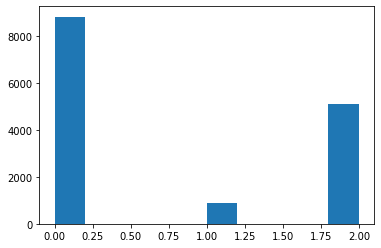

In [163]:
# Visual of our predicted labels
plt.hist(y_predict)

In [180]:
submit_df = pd.DataFrame(y_predict)
submit_df

,0
0,2
1,2
2,0
3,2
4,0
...,...
14845,0
14846,0
14847,2
14848,0


In [181]:
submit_df.to_csv('submit.csv')

In [179]:
xy = pd.read_csv('submit.csv')
display(xy)

,Unnamed: 0,0
0,0,2
1,1,2
2,2,0
3,3,2
4,4,0
...,...,...
14845,14845,0
14846,14846,0
14847,14847,2
14848,14848,0
